In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns
from sklearn.cluster import KMeans   #<---- We will use sci-kit learns implementation of K-means
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [3]:
city = pd.read_csv('df_final2.csv', delimiter=',')
city.head()

income  age  years_with_bank  nbr_children  gender_F   gender_M    
0   26150   46                5             1          0          1  \
1    6605   71                1             0          0          1   
2   18548   38                8             0          1          0   
3   47668   54                3             0          1          0   
4   44554   59                9             2          1          0   

   marital_status_1  marital_status_2  marital_status_3  marital_status_4   
0                 0                 1                 0                 0  \
1                 0                 1                 0                 0   
2                 1                 0                 0                 0   
3                 1                 0                 0                 0   
4                 0                 0                 0                 1   

   ...  city_name_Seattle                                    
0  ...                                                  0   \
1  ...                                                  0    
2  ...                                                  0    
3  ...                                                  0    
4  ...                                                  0    

   city_name_St Louis                                   
0                                                  0   \
1                                                  0    
2                                                  0    
3                                                  0    
4                                                  0    

   city_name_St Paul                                    
0                                                  0   \
1                                                  0    
2                                                  0    
3                                                  0    
4                                                  0    

   city_name_Tampa                                      
0                                                  0   \
1                                                  0    
2                                                  0    
3                                                  0    
4                                                  0    

   city_name_Toledo                                     
0                                                  0   \
1                                                  0    
2                                                  0    
3                                                  0    
4                                                  0    

   city_name_Tucson                                     
0                                                  0   \
1                                                  0    
2                                                  0    
3                                                  0    
4                                                  0    

   city_name_Tulsa                                      
0                                                  0   \
1                                                  0    
2                                                  0    
3                                                  0    
4                                                  0    

   city_name_Virginia Beach                             
0                                                  0   \
1                                                  0    
2                                                  0    
3                                                  0    
4                                                  0    

   city_name_Washington                                 
0                                                  0   \
1                                                  0    
2                                                  0    
3                                                  0    
4                                                  0  

In [4]:
from sklearn.preprocessing import StandardScaler
# create a new DataFrame with only the columns to standardize
subset = city[['income', 'age']]

# instantiate StandardScaler object
scaler = StandardScaler()

# fit scaler to data
scaler.fit(subset)


# transform data
subset_transformed = scaler.transform(subset)

# transform data and overwrite original columns
city[['income', 'age']] = scaler.transform(subset)



In [5]:
city.head()

income       age  years_with_bank  nbr_children  gender_F   gender_M    
0  0.154185  0.184312                5             1          0          1  \
1 -0.726524  1.493070                1             0          0          1   
2 -0.188366 -0.234490                8             0          1          0   
3  1.123798  0.603115                3             0          1          0   
4  0.983479  0.864867                9             2          1          0   

   marital_status_1  marital_status_2  marital_status_3  marital_status_4   
0                 0                 1                 0                 0  \
1                 0                 1                 0                 0   
2                 1                 0                 0                 0   
3                 1                 0                 0                 0   
4                 0                 0                 0                 1   

   ...  city_name_Seattle                                    
0  ...                                                  0   \
1  ...                                                  0    
2  ...                                                  0    
3  ...                                                  0    
4  ...                                                  0    

   city_name_St Louis                                   
0                                                  0   \
1                                                  0    
2                                                  0    
3                                                  0    
4                                                  0    

   city_name_St Paul                                    
0                                                  0   \
1                                                  0    
2                                                  0    
3                                                  0    
4                                                  0    

   city_name_Tampa                                      
0                                                  0   \
1                                                  0    
2                                                  0    
3                                                  0    
4                                                  0    

   city_name_Toledo                                     
0                                                  0   \
1                                                  0    
2                                                  0    
3                                                  0    
4                                                  0    

   city_name_Tucson                                     
0                                                  0   \
1                                                  0    
2                                                  0    
3                                                  0    
4                                                  0    

   city_name_Tulsa                                      
0                                                  0   \
1                                                  0    
2                                                  0    
3                                                  0    
4                                                  0    

   city_name_Virginia Beach                             
0                                                  0   \
1                                                  0    
2                                                  0    
3                                                  0    
4                                                  0    

   city_name_Washington                                 
0                                                  0   \
1                                                  0    
2                                                  0    
3                                                  0    
4             

In [6]:
city['gender_F '] = 0.5*city['gender_F ']

In [7]:
city.head()

income       age  years_with_bank  nbr_children  gender_F   gender_M    
0  0.154185  0.184312                5             1        0.0          1  \
1 -0.726524  1.493070                1             0        0.0          1   
2 -0.188366 -0.234490                8             0        0.5          0   
3  1.123798  0.603115                3             0        0.5          0   
4  0.983479  0.864867                9             2        0.5          0   

   marital_status_1  marital_status_2  marital_status_3  marital_status_4   
0                 0                 1                 0                 0  \
1                 0                 1                 0                 0   
2                 1                 0                 0                 0   
3                 1                 0                 0                 0   
4                 0                 0                 0                 1   

   ...  city_name_Seattle                                    
0  ...                                                  0   \
1  ...                                                  0    
2  ...                                                  0    
3  ...                                                  0    
4  ...                                                  0    

   city_name_St Louis                                   
0                                                  0   \
1                                                  0    
2                                                  0    
3                                                  0    
4                                                  0    

   city_name_St Paul                                    
0                                                  0   \
1                                                  0    
2                                                  0    
3                                                  0    
4                                                  0    

   city_name_Tampa                                      
0                                                  0   \
1                                                  0    
2                                                  0    
3                                                  0    
4                                                  0    

   city_name_Toledo                                     
0                                                  0   \
1                                                  0    
2                                                  0    
3                                                  0    
4                                                  0    

   city_name_Tucson                                     
0                                                  0   \
1                                                  0    
2                                                  0    
3                                                  0    
4                                                  0    

   city_name_Tulsa                                      
0                                                  0   \
1                                                  0    
2                                                  0    
3                                                  0    
4                                                  0    

   city_name_Virginia Beach                             
0                                                  0   \
1                                                  0    
2                                                  0    
3                                                  0    
4                                                  0    

   city_name_Washington                                 
0                                                  0   \
1                                                  0    
2                                                  0    
3                                                  0    
4             

In [8]:
print(city.columns)

Index(['income', 'age', 'years_with_bank', 'nbr_children', 'gender_F ',
       'gender_M ', 'marital_status_1', 'marital_status_2', 'marital_status_3',
       'marital_status_4',
       'city_name_Albuquerque                             ',
       'city_name_Anaheim                                 ',
       'city_name_Arlington                               ',
       'city_name_Atlanta                                 ',
       'city_name_Austin                                  ',
       'city_name_Baltimore                               ',
       'city_name_Birmingham                              ',
       'city_name_Boston                                  ',
       'city_name_Buffalo                                 ',
       'city_name_Charlotte                               ',
       'city_name_Chicago                                 ',
       'city_name_Cincinnati                              ',
       'city_name_Cleveland                               ',
       'city_name_Colorado S

In [9]:
city= city.drop(['gender_M ','marital_status_4','city_name_Wichita                                 '], axis=1)


In [10]:
city.head()

income       age  years_with_bank  nbr_children  gender_F    
0  0.154185  0.184312                5             1        0.0  \
1 -0.726524  1.493070                1             0        0.0   
2 -0.188366 -0.234490                8             0        0.5   
3  1.123798  0.603115                3             0        0.5   
4  0.983479  0.864867                9             2        0.5   

   marital_status_1  marital_status_2  marital_status_3   
0                 0                 1                 0  \
1                 0                 1                 0   
2                 1                 0                 0   
3                 1                 0                 0   
4                 0                 0                 0   

   city_name_Albuquerque                                
0                                                  0   \
1                                                  0    
2                                                  0    
3                                                  0    
4                                                  0    

   city_name_Anaheim                                   ...   
0                                                  0   ...  \
1                                                  0   ...   
2                                                  0   ...   
3                                                  0   ...   
4                                                  0   ...   

   city_name_Santa Ana                                  
0                                                  0   \
1                                                  0    
2                                                  0    
3                                                  0    
4                                                  0    

   city_name_Seattle                                    
0                                                  0   \
1                                                  0    
2                                                  0    
3                                                  0    
4                                                  0    

   city_name_St Louis                                   
0                                                  0   \
1                                                  0    
2                                                  0    
3                                                  0    
4                                                  0    

   city_name_St Paul                                    
0                                                  0   \
1                                                  0    
2                                                  0    
3                                                  0    
4                                                  0    

   city_name_Tampa                                      
0                                                  0   \
1                                                  0    
2                                                  0    
3                                                  0    
4                                                  0    

   city_name_Toledo                                     
0                                                  0   \
1                                                  0    
2                                                  0    
3                                                  0    
4                                                  0    

   city_name_Tucson                                     
0                                                  0   \
1                                                  0    
2                                                  0    
3                                                  0    
4                                                  0    

   city_name_Tulsa                                      
0                                                  0   \
1               

In [11]:
model = KMeans(2) #instatiatingaa

In [12]:
model.fit(city)   #This is where the K-means algorithm is iterating

KMeans(n_clusters=2)

In [13]:
y_pred = model.predict(city)
y_pred #each data point gets a predicted cluster number (0, 1, 2, or 3 in this case)

array([1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0,
       1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1,
       0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1,
       1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0,
       0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1,
       1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1,
       0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0,

In [14]:
print(model.cluster_centers_) #centroids

[[-2.48386472e-02 -1.21568251e-01  1.95150115e+00  7.36720554e-01
   2.78290993e-01  3.87990762e-01  4.48036952e-01  6.92840647e-02
   1.15473441e-02  9.23787529e-03  2.30946882e-03  2.30946882e-03
   1.61662818e-02  1.61662818e-02  2.30946882e-03  1.15473441e-02
   2.30946882e-03  9.23787529e-03  9.00692841e-02  9.23787529e-03
   6.92840647e-03  2.30946882e-03  4.61893764e-03  9.23787529e-03
   1.61662818e-02  2.30946882e-03  1.15473441e-02  1.15473441e-02
   2.30946882e-03  4.61893764e-03  6.92840647e-03  9.23787529e-03
   6.69745958e-02  1.84757506e-02  9.23787529e-03  9.23787529e-03
   1.15473441e-02  1.04083409e-17  9.23787529e-03  6.92840647e-03
   1.08545035e-01  9.23787529e-03  6.92840647e-03  6.92840647e-03
   6.92840647e-03  2.30946882e-02  1.15473441e-02  1.15473441e-02
   4.61893764e-03  1.17782910e-01  1.38568129e-02  6.92840647e-03
   4.61893764e-03  9.23787529e-03  2.30946882e-03  3.23325635e-02
   1.84757506e-02  6.92840647e-03  2.07852194e-02  9.23787529e-03
   1.15473

In [15]:
inertias = []
K = range(1,11) #run K-means with K ranging from 1 to 10
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(city)
    inertias.append(kmeanModel.inertia_)

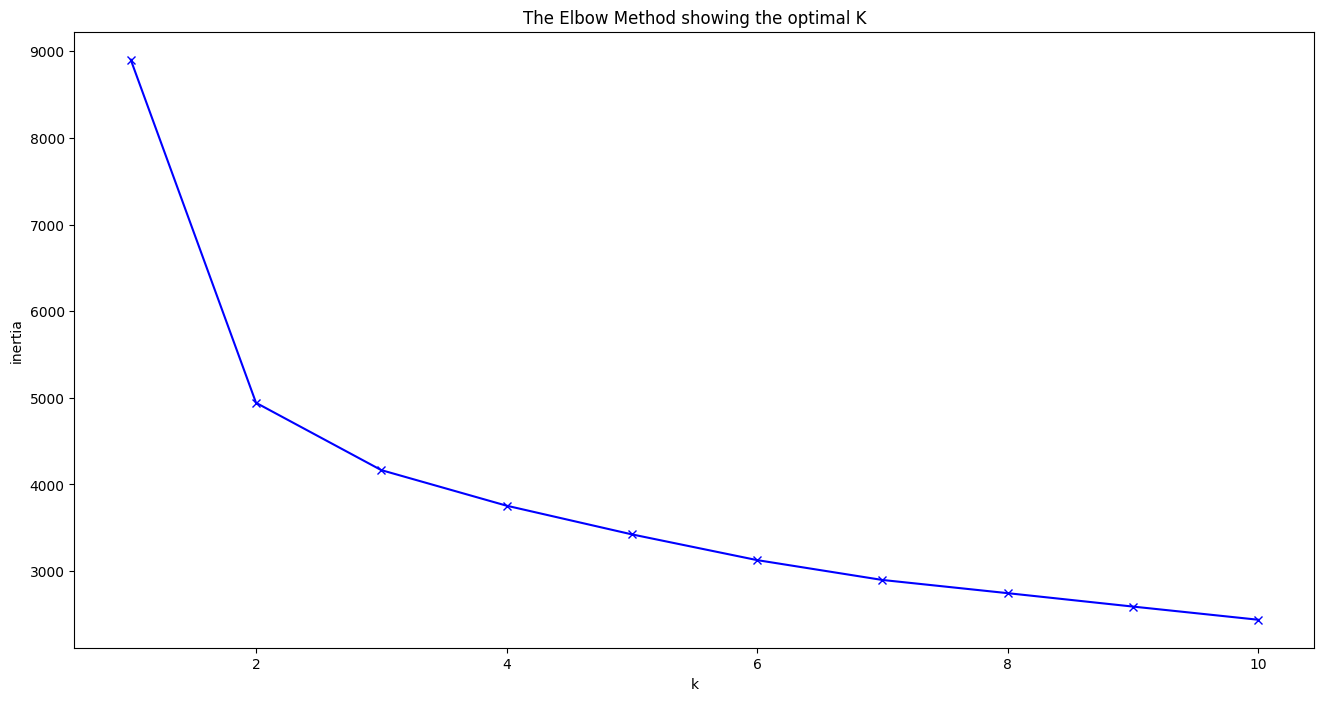

In [16]:
# plot elbow method
plt.figure(figsize=(16,8))
plt.plot(K, inertias, 'bx-')
plt.xlabel('k')
plt.ylabel('inertia')
plt.title('The Elbow Method showing the optimal K')
plt.show()

In [17]:
from sklearn.metrics import silhouette_score

silhouettes = []
K = range(2,10) #run K-means with K ranging from 2 to 10
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(city)
    label=kmeanModel.predict(city)
    silhouettes.append(silhouette_score(city,label))

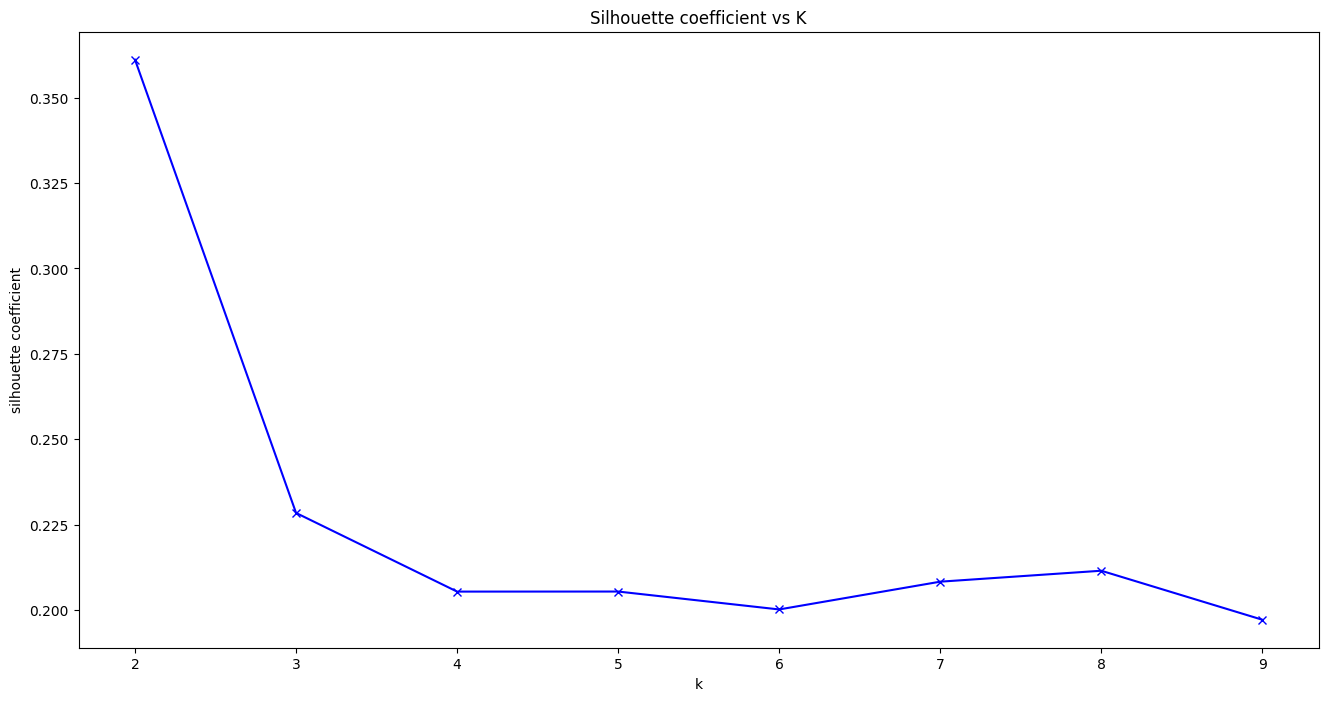

In [18]:
# plot silhouette
plt.figure(figsize=(16,8))
plt.plot(K, silhouettes, 'bx-')
plt.xlabel('k')
plt.ylabel('silhouette coefficient')
plt.title('Silhouette coefficient vs K')
plt.show()

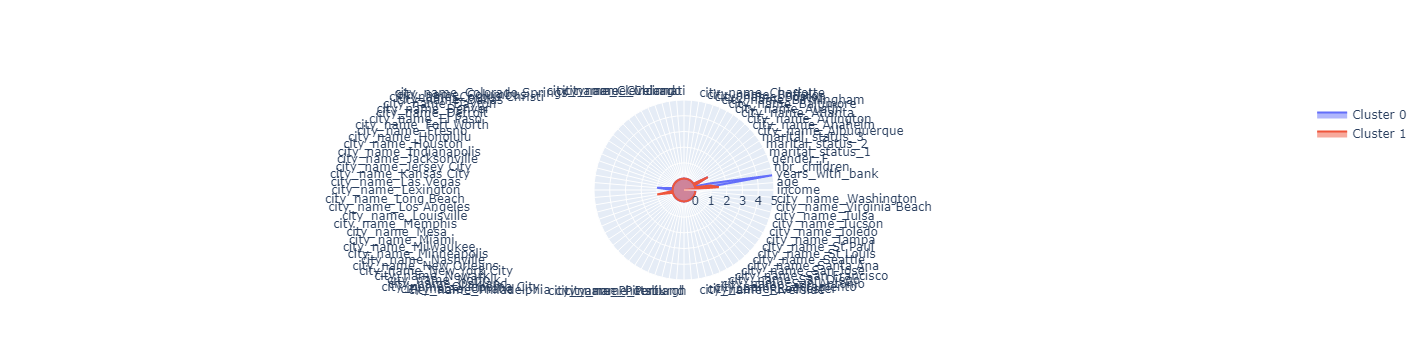

In [20]:
import plotly.graph_objects as go
#Radar plot

#Plot features (columns) as theta (angle). Use the data grouped by the clusters
angle = city.columns

# 3: Initialize plot/figure
chart = go.Figure()

# Loop over each cluster 
for i in range(2):
    # Select column values in df_scaled
    radius = city.loc[i].values

# Plot values
    chart .add_trace(go.Scatterpolar
        (r = radius,
        theta = angle,
        fill = "toself",
        name = f'Cluster {i}'
            )
        )
# Add labels etc
chart.update_layout(
    polar=dict (  radialaxis = dict (visible = True)  ),
    showlegend=True
        )

chart.show()

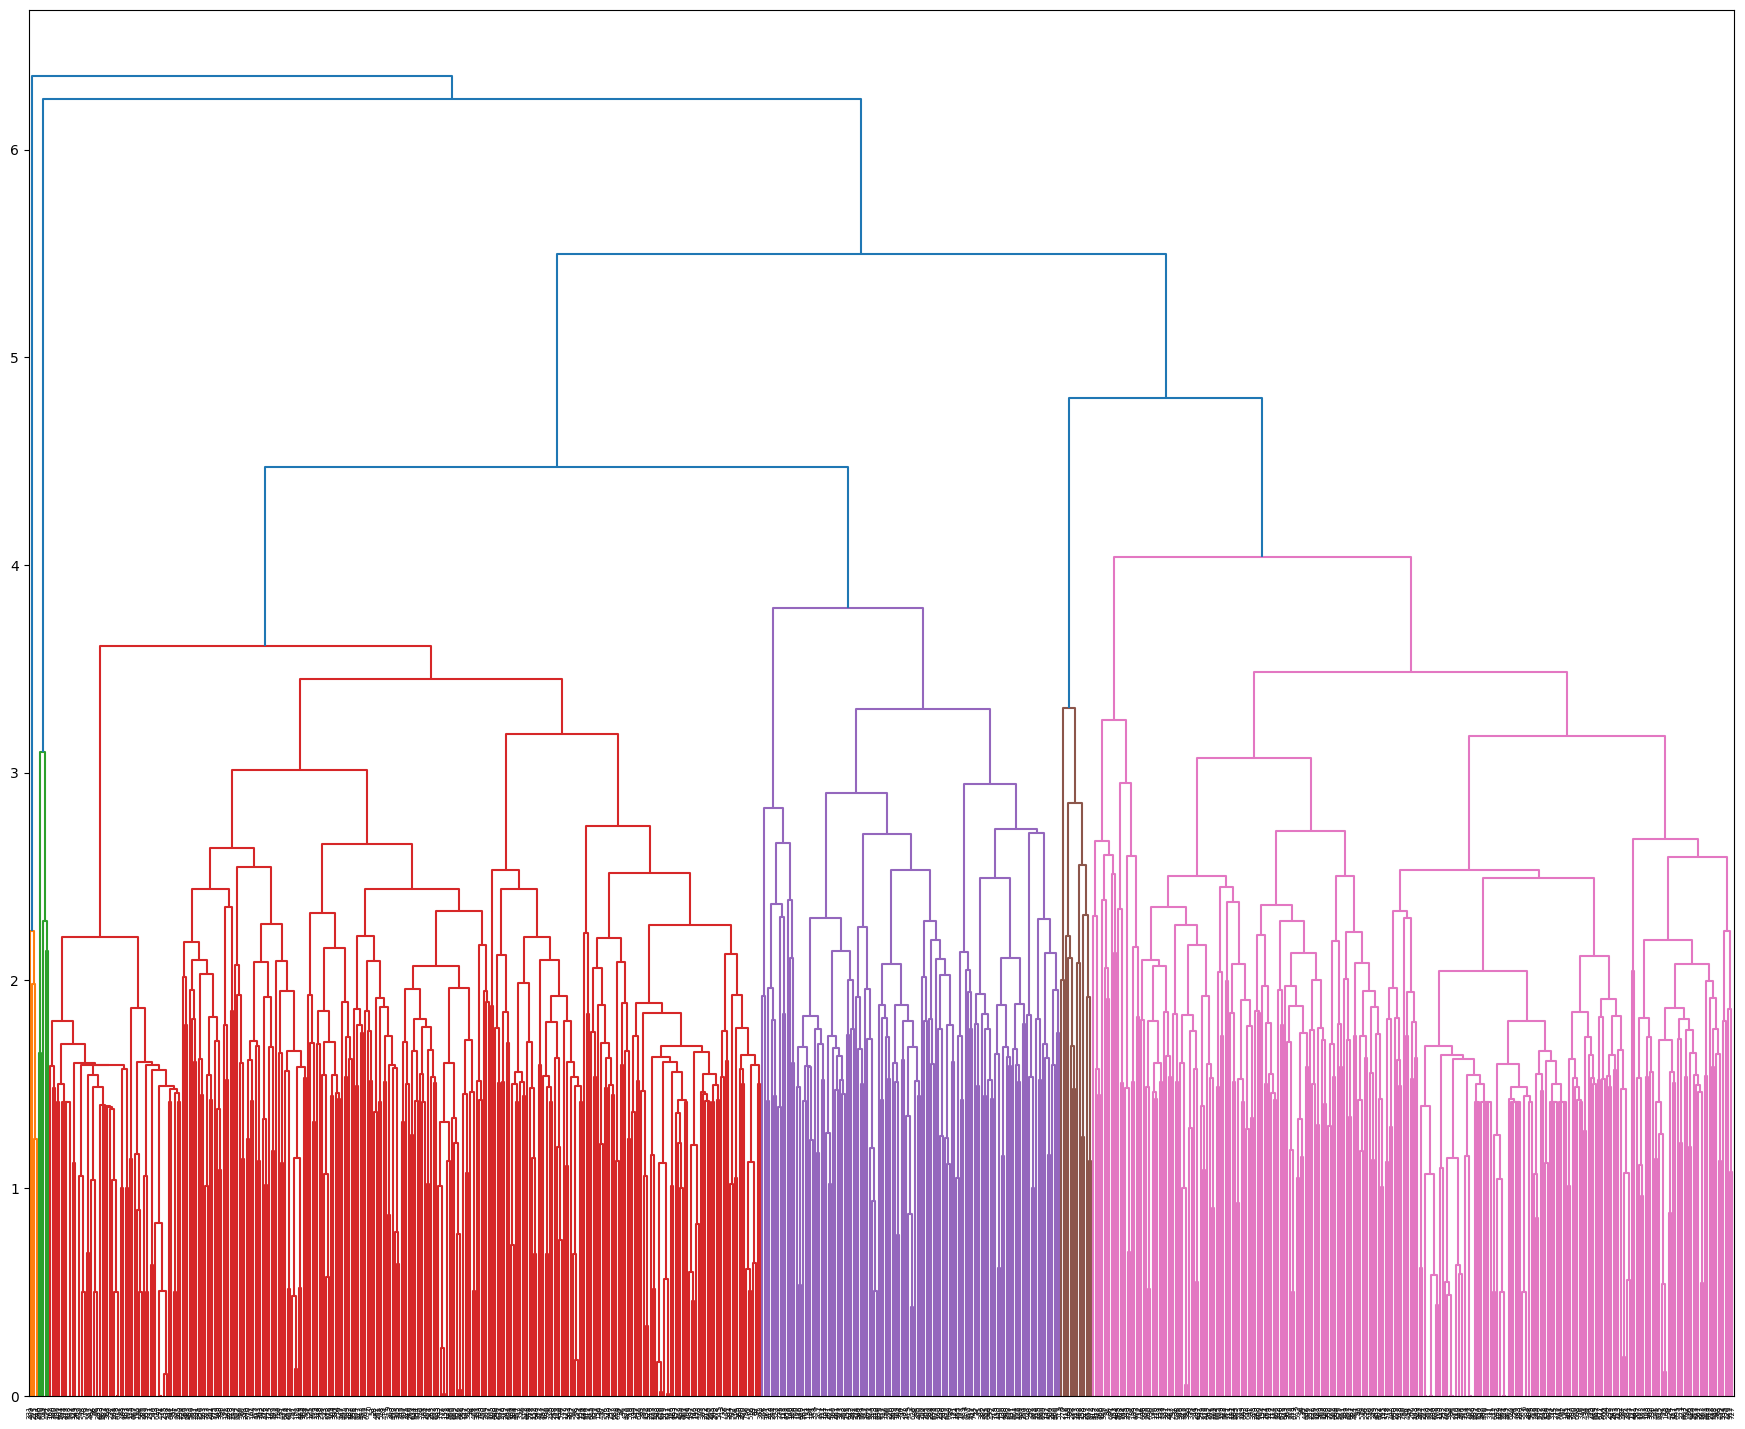

In [91]:
# Hierarchical clustering
from scipy.cluster.hierarchy import linkage, dendrogram
linkage_type = 'average' 

linkage_matrix = linkage(city, linkage_type)

plt.figure(figsize=(22,18))
dendrogram(linkage_matrix) # plot using 'dendrogram()'

plt.show()

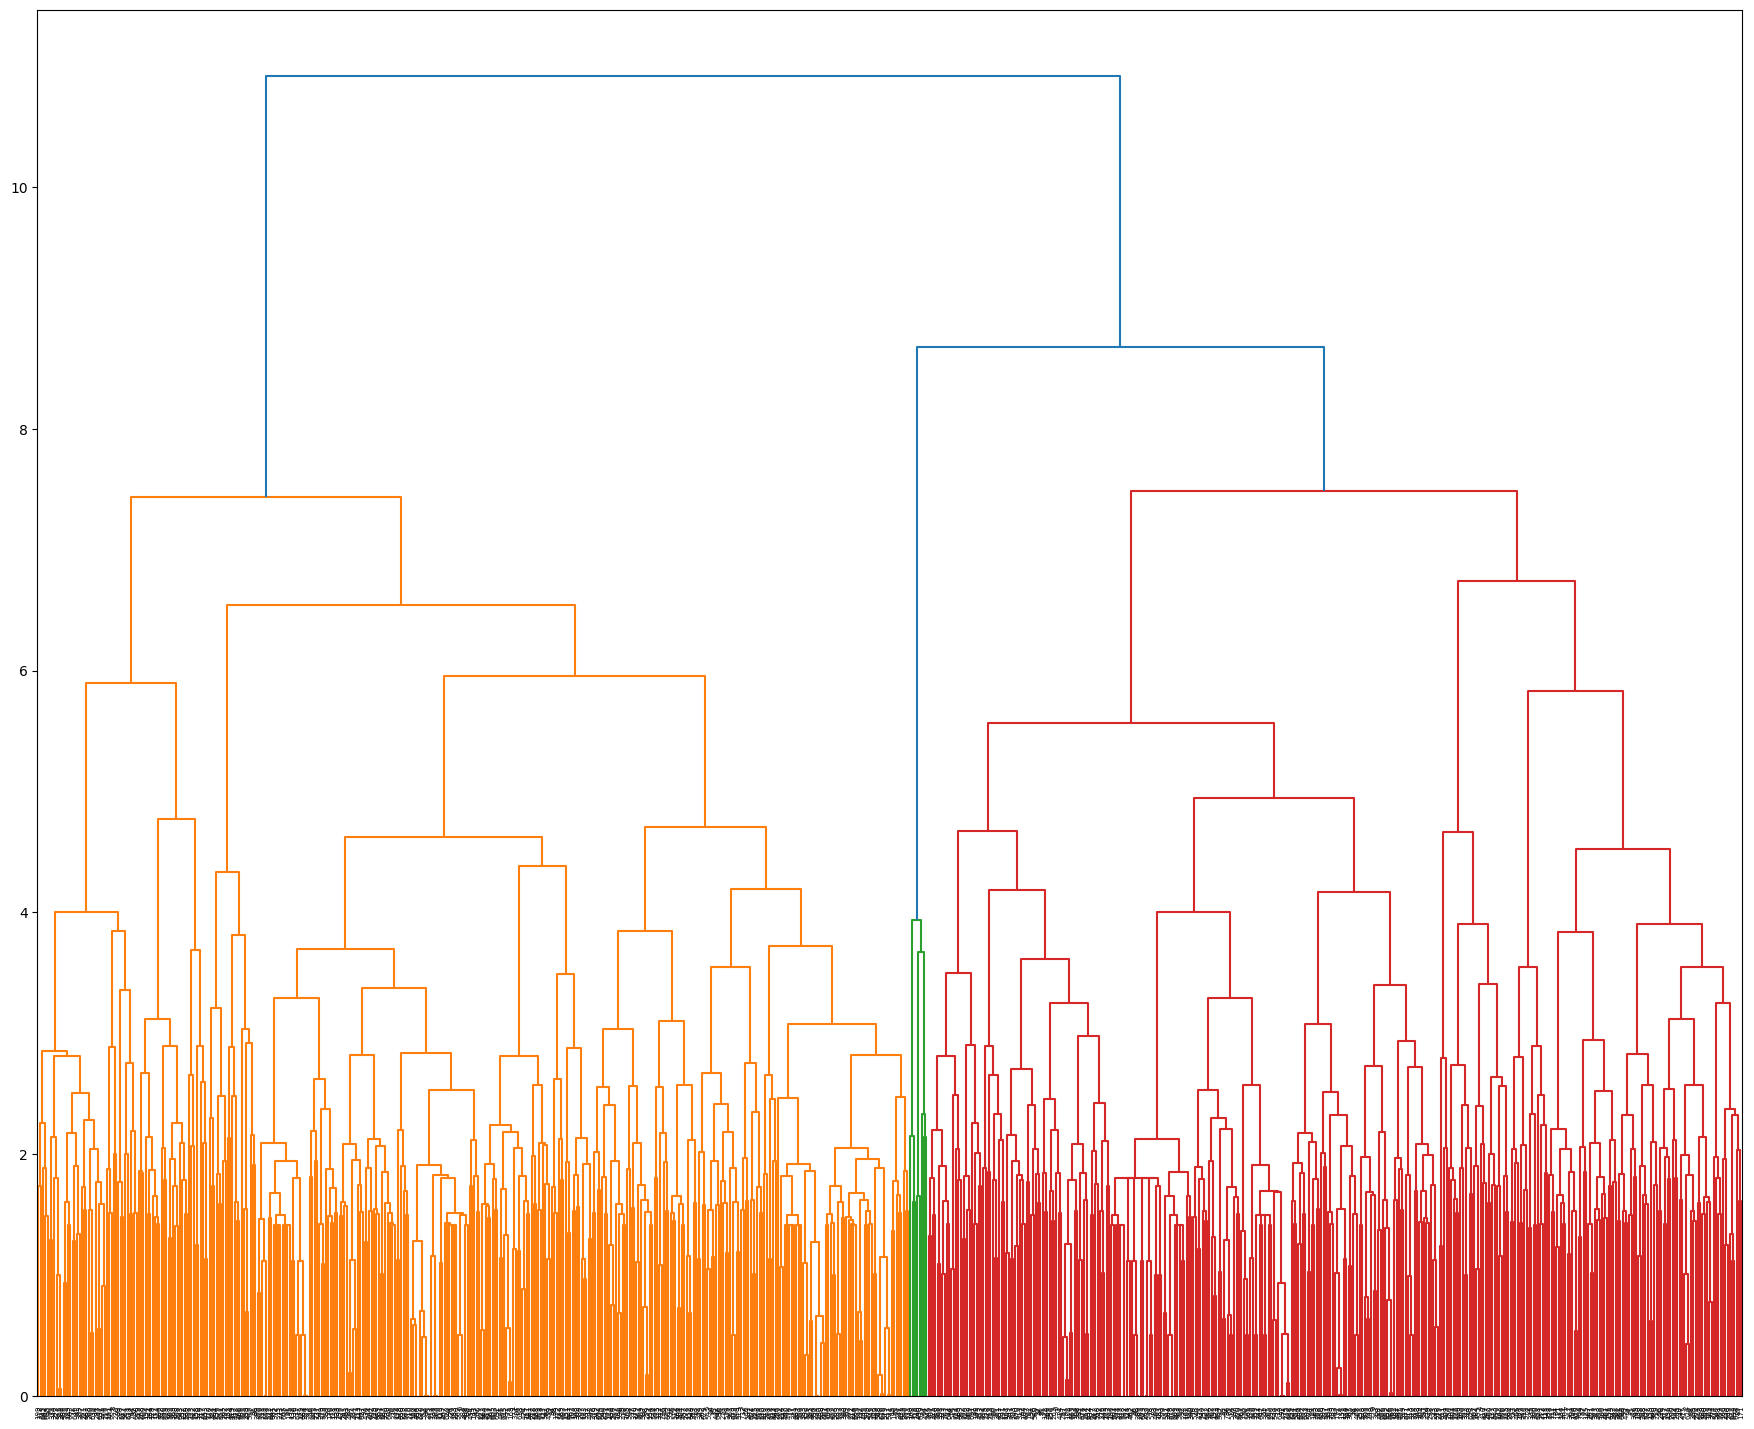

In [92]:
# Hierarchical clustering
from scipy.cluster.hierarchy import linkage, dendrogram
linkage_type = 'complete'

linkage_matrix = linkage(city, linkage_type)

plt.figure(figsize=(22,18))
dendrogram(linkage_matrix) # plot using 'dendrogram()'

plt.show()

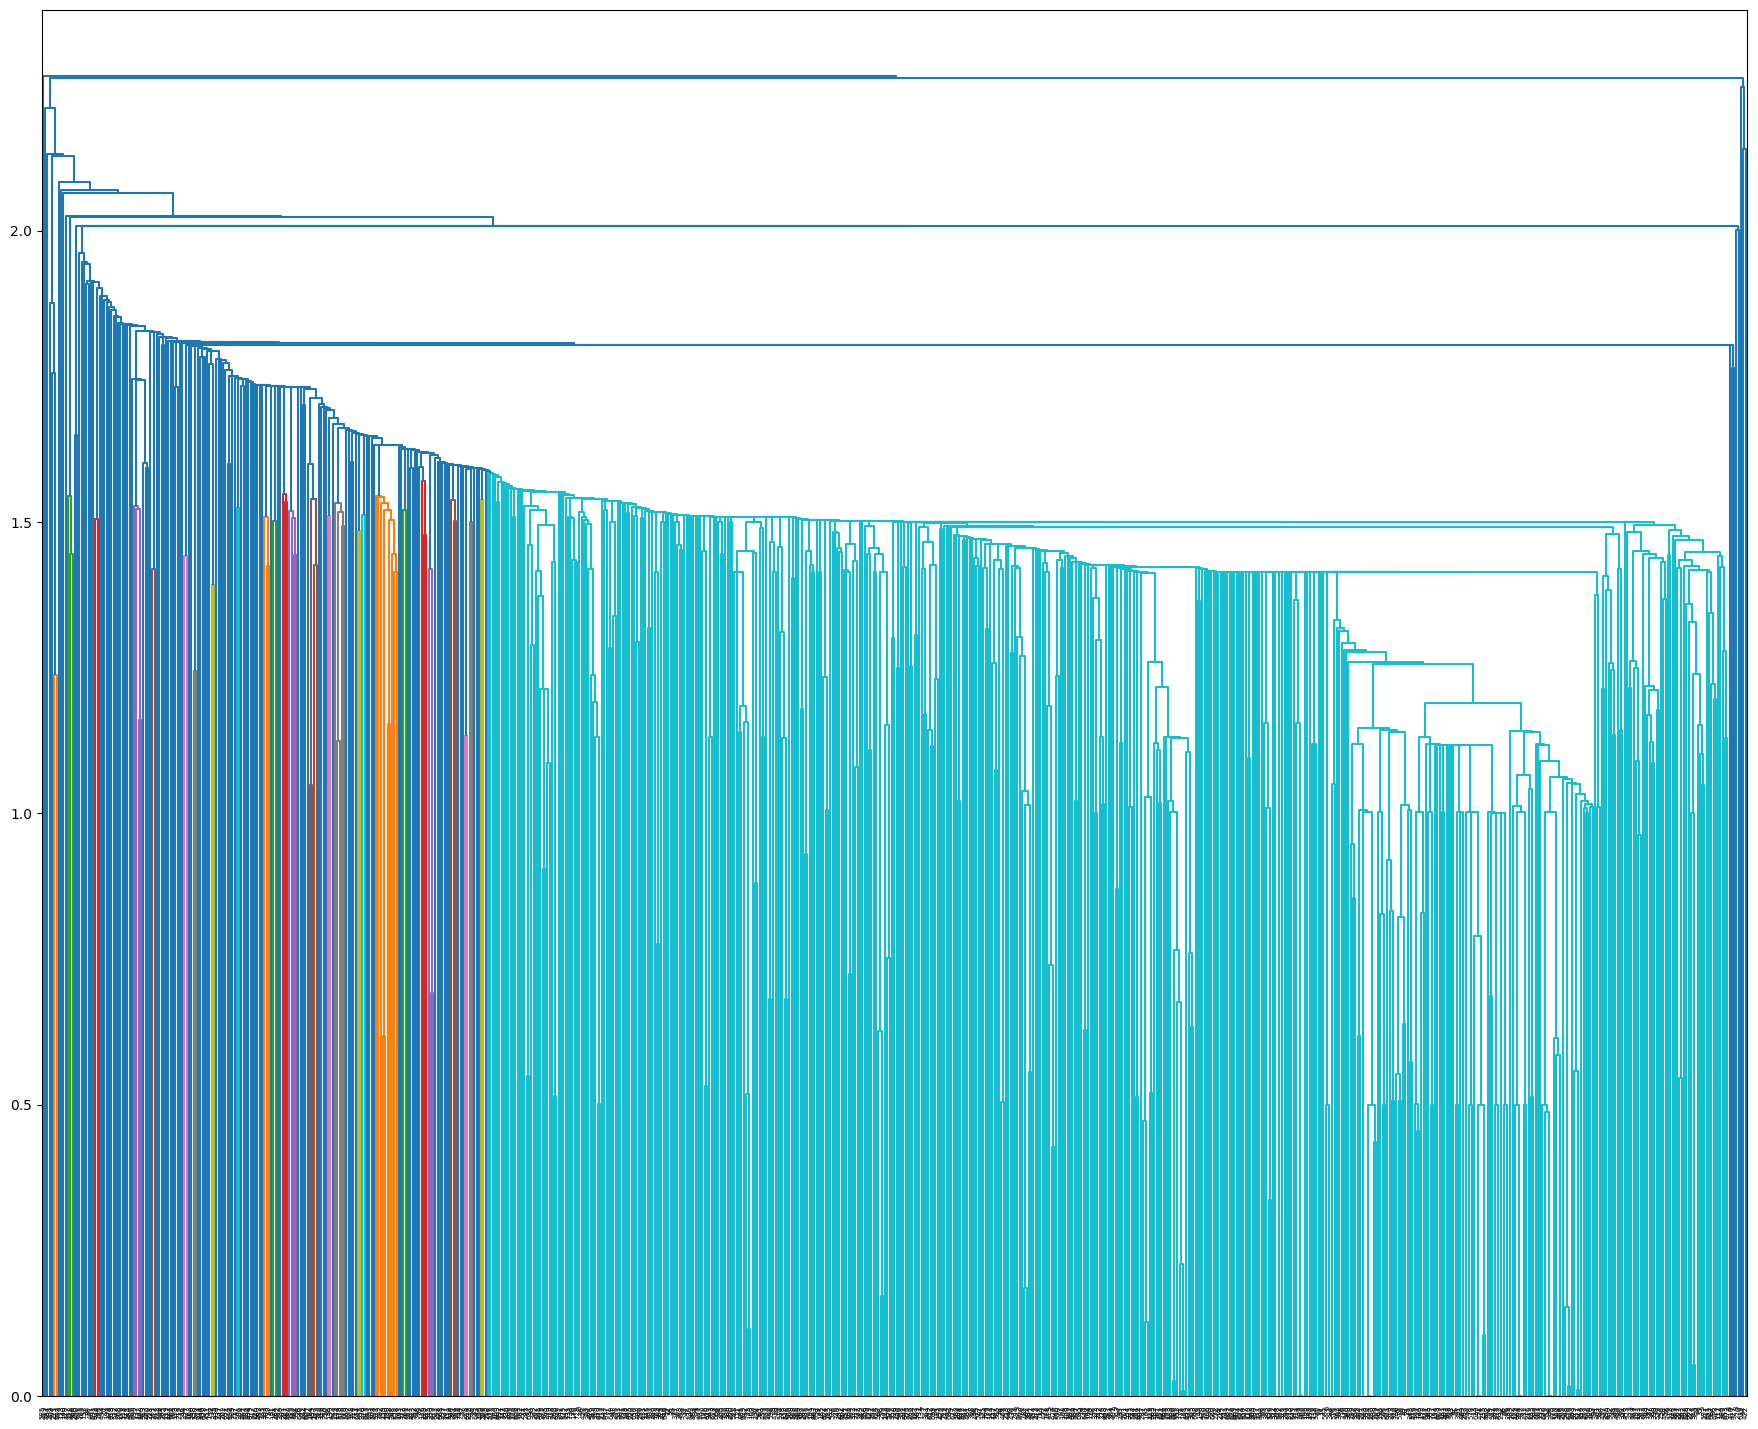

In [93]:
# Hierarchical clustering
from scipy.cluster.hierarchy import linkage, dendrogram
linkage_type = 'single'

linkage_matrix = linkage(city, linkage_type)

plt.figure(figsize=(22,18))
dendrogram(linkage_matrix) # plot using 'dendrogram()'

plt.show()

In [39]:
from sklearn.cluster import AgglomerativeClustering
# single
single = AgglomerativeClustering(n_clusters=3, linkage="single")
single_pred = single.fit_predict(city)

# complete
complete = AgglomerativeClustering(n_clusters=3, linkage="complete")
complete_pred = complete.fit_predict(city)

# average
avg = AgglomerativeClustering(n_clusters=3, linkage="average")
avg_pred = avg.fit_predict(city)

In [101]:
# comparing the 3 linkage using silhouette score
single_silhouette = silhouette_score(city, single_pred)
complete_silhouette = silhouette_score(city, complete_pred)
avg_silhouette = silhouette_score(city, avg_pred)

print( "Scores: \nSingle:", single_silhouette,"\nComplete: ", complete_silhouette, "\nAverage: ", avg_silhouette)

Scores: 
Single: 0.13197041431517853 
Complete:  0.30380990991149753 
Average:  0.20399448910631232


In [ ]:
# for 3 the complete is the best

In [ ]:
#DBScan

In [35]:
from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.datasets import make_blobs


In [26]:
# Compute DBSCAN
db = DBSCAN(eps=3, min_samples=30)
db.fit(city) #algorithm runs

core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
#core_samples_mask will be True if the data point was a core point. Otherwise false.

labels = db.labels_
#actual cluster label. If outliers, gets assigned -1

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0) #number of unique clusters labels (excluding -1)
n_noise_ = list(labels).count(-1) #counts how many outliers there are (labels with -1)

print('Estimated number of clusters: %d' % n_clusters_)
print('Estimated number of noise points: %d' % n_noise_)


Estimated number of clusters: 1
Estimated number of noise points: 1


In [21]:

from sklearn.decomposition import PCA

pca = PCA(n_components=None)

dfx_pca = pca.fit(city)

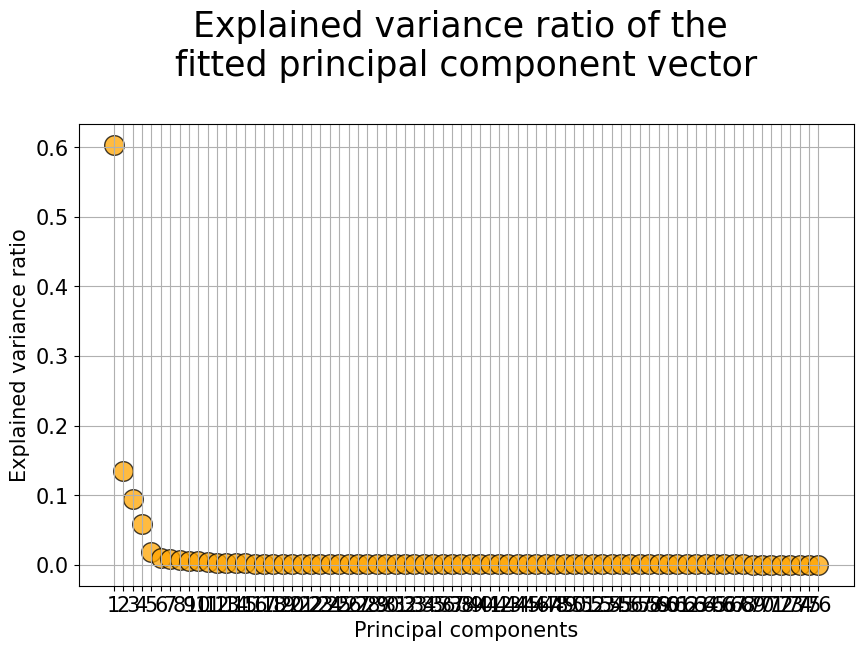

In [22]:

plt.figure(figsize=(10,6))
plt.scatter(x=[i+1 for i in range(len(dfx_pca.explained_variance_ratio_))],
            y=dfx_pca.explained_variance_ratio_,
           s=200, alpha=0.75,c='orange',edgecolor='k')
plt.grid(True)
plt.title("Explained variance ratio of the \nfitted principal component vector\n",fontsize=25)
plt.xlabel("Principal components",fontsize=15)
plt.xticks([i+1 for i in range(len(dfx_pca.explained_variance_ratio_))],fontsize=15)
plt.yticks(fontsize=15)
plt.ylabel("Explained variance ratio",fontsize=15)
plt.show()

In [24]:
pca = PCA(n_components=5)
dfx_pca = pca.fit(city)

In [31]:
dfx_trans = pca.transform(city)
dfx_trans = pd.DataFrame(data=dfx_trans)

In [26]:
X = X= pca.transform(city)

In [43]:
km = KMeans(n_clusters=2, # how many clusters we expected 
            n_init=10, # how many initial runs
            random_state=0)

# fit and predict
y_km = km.fit_predict(X)
labels = km.fit_predict(pca.transform(city))

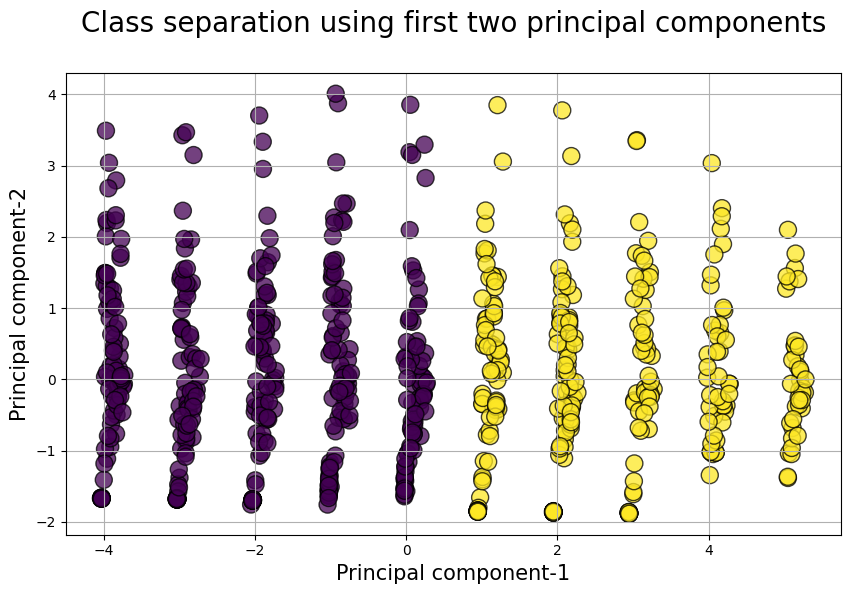

In [44]:
plt.figure(figsize=(10,6))
plt.scatter(dfx_trans[0],dfx_trans[1],c=labels,edgecolors='k',alpha=0.75,s=150)
plt.grid(True)
plt.title("Class separation using first two principal components\n",fontsize=20)
plt.xlabel("Principal component-1",fontsize=15)
plt.ylabel("Principal component-2",fontsize=15)
plt.show()

In [33]:
def plotclusters(X,y_res,type_separation, plt_cluster_centers = False):
    X_centroids = []
    Y_centroids = []

    for cluster in set(y_res):
        x = X[y_res == cluster,0]
        y = X[y_res == cluster,1]
        X_centroids.append(np.mean(x))
        Y_centroids.append(np.mean(y))

        plt.scatter(x,
                    y,
                    edgecolors='k',alpha=0.75,s=150,
                    label=f'cluster {cluster}')

    if plt_cluster_centers:
        plt.scatter(X_centroids,
                    Y_centroids,
                    marker='*',
                    c='red',
                    s=250,
                    label='centroids')

    plt.title('Class separation (' + str(type_separation) + ') using first two principal components\n',fontsize=20)
    plt.xlabel("Principal component-1",fontsize=15)
    plt.ylabel("Principal component-2",fontsize=15)
    plt.legend()
    plt.grid()
    plt.show()

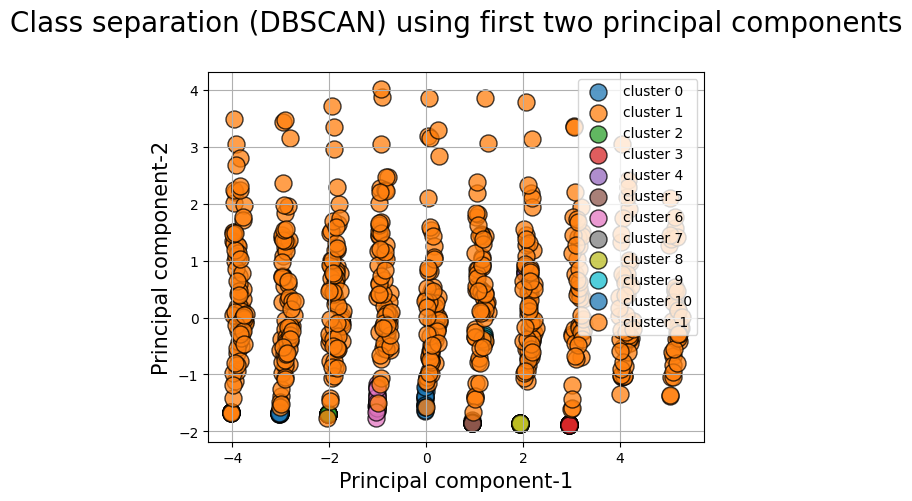

In [37]:
# Clustering with DBSCAN
db = DBSCAN(eps=0.2,
            min_samples=5,
            metric='euclidean')
T = pca.transform(city) 
y_db = db.fit_predict(T)

# plot DBSCAN clusters
plotclusters(T,y_db,'DBSCAN')

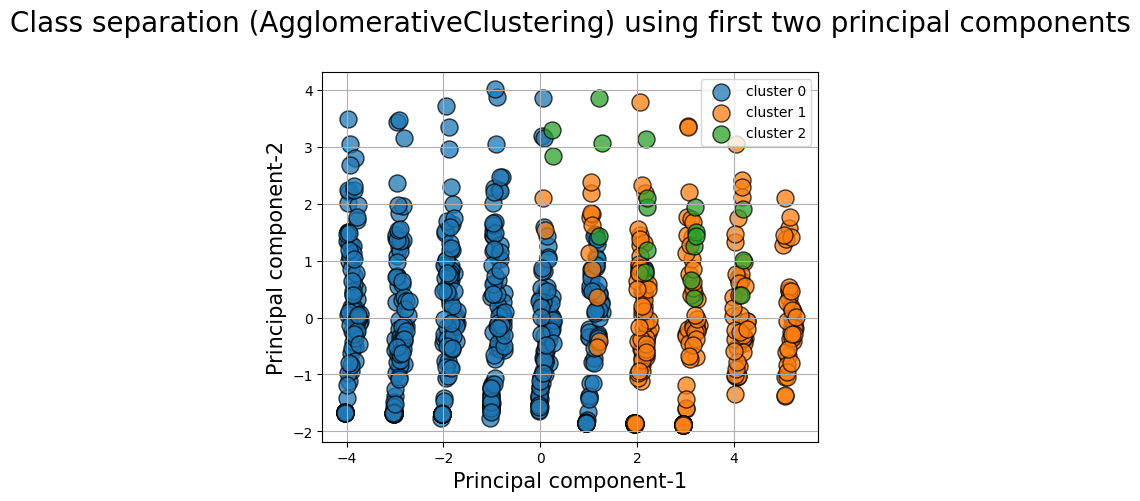

In [42]:
complete = AgglomerativeClustering(n_clusters=3, linkage="complete")

T = pca.transform(city) 
y_db = complete.fit_predict(T)

# plot Hierachial clusters
plotclusters(T,y_db,'AgglomerativeClustering')